In [2]:
#Import Required Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


plt.style.use('default')
plt.rcParams['figure.figsize'] = (10,6)
print("Libraries imported successfully!")

Libraries imported successfully!


In [3]:
#Load Dataset


df = pd.read_csv("Students Social Media Addiction.csv")

print("Dataset Loaded Successfully!")
print("\nFirst 5 Rows of Dataset:")
print(df)

Dataset Loaded Successfully!

First 5 Rows of Dataset:
     Student_ID  Age  Gender Academic_Level     Country  \
0             1   19  Female  Undergraduate  Bangladesh   
1             2   22    Male       Graduate       India   
2             3   20  Female  Undergraduate         USA   
3             4   18    Male    High School          UK   
4             5   21    Male       Graduate      Canada   
..          ...  ...     ...            ...         ...   
700         701   20  Female  Undergraduate       Italy   
701         702   23    Male       Graduate      Russia   
702         703   21  Female  Undergraduate       China   
703         704   24    Male       Graduate       Japan   
704         705   19  Female  Undergraduate      Poland   

     Avg_Daily_Usage_Hours Most_Used_Platform Affects_Academic_Performance  \
0                      5.2          Instagram                          Yes   
1                      2.1            Twitter                           No   
2 

In [4]:
#Basic Dataset Information


print("\nDataset Shape (Rows, Columns):")
print(df.shape)

print("\nColumn Names:")
print(df.columns)

print("\nData Types:")
print(df.dtypes)


Dataset Shape (Rows, Columns):
(705, 13)

Column Names:
Index(['Student_ID', 'Age', 'Gender', 'Academic_Level', 'Country',
       'Avg_Daily_Usage_Hours', 'Most_Used_Platform',
       'Affects_Academic_Performance', 'Sleep_Hours_Per_Night',
       'Mental_Health_Score', 'Relationship_Status',
       'Conflicts_Over_Social_Media', 'Addicted_Score'],
      dtype='object')

Data Types:
Student_ID                        int64
Age                               int64
Gender                           object
Academic_Level                   object
Country                          object
Avg_Daily_Usage_Hours           float64
Most_Used_Platform               object
Affects_Academic_Performance     object
Sleep_Hours_Per_Night           float64
Mental_Health_Score               int64
Relationship_Status              object
Conflicts_Over_Social_Media       int64
Addicted_Score                    int64
dtype: object


In [5]:
#Missing Values Analysis


print("\nChecking Missing Values...")
missing_values = df.isnull().sum()
print(missing_values)

print("\nColumns with Missing Values:")
print(missing_values[missing_values > 0])


Checking Missing Values...
Student_ID                      0
Age                             0
Gender                          0
Academic_Level                  0
Country                         0
Avg_Daily_Usage_Hours           0
Most_Used_Platform              0
Affects_Academic_Performance    0
Sleep_Hours_Per_Night           0
Mental_Health_Score             0
Relationship_Status             0
Conflicts_Over_Social_Media     0
Addicted_Score                  0
dtype: int64

Columns with Missing Values:
Series([], dtype: int64)


In [8]:
#Missing Values Visualization


if not missing_values[missing_values > 0].empty:
    missing_values[missing_values > 0].plot(kind='bar')
    plt.title("Missing Values Count")
    plt.xlabel("Columns")
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.show()
    print("Missing Values Chart Displayed.")
else:
    print("No missing values found in the dataset.")

No missing values found in the dataset.


In [9]:
#Duplicate Records


print("\nChecking Duplicate Records...")
duplicates = df.duplicated().sum()
print("Total Duplicate Rows:", duplicates)

df = df.drop_duplicates()
print("Duplicates Removed Successfully!")
print("New Dataset Shape:", df.shape)


Checking Duplicate Records...
Total Duplicate Rows: 0
Duplicates Removed Successfully!
New Dataset Shape: (705, 13)


In [10]:
#Summary Statistics


print("\nSummary Statistics (Numerical Columns):")
print(df.describe())


Summary Statistics (Numerical Columns):
       Student_ID         Age  Avg_Daily_Usage_Hours  Sleep_Hours_Per_Night  \
count  705.000000  705.000000             705.000000             705.000000   
mean   353.000000   20.659574               4.918723               6.868936   
std    203.660256    1.399217               1.257395               1.126848   
min      1.000000   18.000000               1.500000               3.800000   
25%    177.000000   19.000000               4.100000               6.000000   
50%    353.000000   21.000000               4.800000               6.900000   
75%    529.000000   22.000000               5.800000               7.700000   
max    705.000000   24.000000               8.500000               9.600000   

       Mental_Health_Score  Conflicts_Over_Social_Media  Addicted_Score  
count           705.000000                   705.000000      705.000000  
mean              6.226950                     2.849645        6.436879  
std               1.10505

In [11]:
#Filling Missing Values


print("\nFilling Missing Values...")

# Numeric columns
for col in df.select_dtypes(include=np.number).columns:
    df[col].fillna(df[col].median(), inplace=True)
    print(f"Filled numeric missing values in {col} with median.")

# Categorical columns
for col in df.select_dtypes(include='object').columns:
    df[col].fillna(df[col].mode()[0], inplace=True)
    print(f"Filled categorical missing values in {col} with mode.")

print("Missing Values Treatment Completed!")


Filling Missing Values...
Filled numeric missing values in Student_ID with median.
Filled numeric missing values in Age with median.
Filled numeric missing values in Avg_Daily_Usage_Hours with median.
Filled numeric missing values in Sleep_Hours_Per_Night with median.
Filled numeric missing values in Mental_Health_Score with median.
Filled numeric missing values in Conflicts_Over_Social_Media with median.
Filled numeric missing values in Addicted_Score with median.
Filled categorical missing values in Gender with mode.
Filled categorical missing values in Academic_Level with mode.
Filled categorical missing values in Country with mode.
Filled categorical missing values in Most_Used_Platform with mode.
Filled categorical missing values in Affects_Academic_Performance with mode.
Filled categorical missing values in Relationship_Status with mode.
Missing Values Treatment Completed!



Gender Distribution:
Gender
Female    353
Male      352
Name: count, dtype: int64


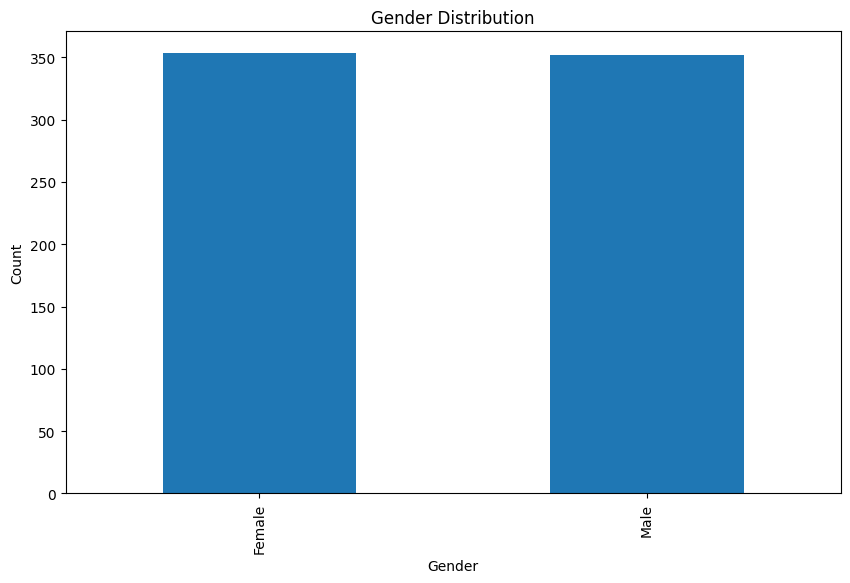

Gender Distribution Chart Displayed.


In [12]:
#EXPLORATORY DATA ANALYSIS
#Gender Distribution (If Exists)


if 'Gender' in df.columns:
    print("\nGender Distribution:")
    print(df['Gender'].value_counts())

    df['Gender'].value_counts().plot(kind='bar')
    plt.title("Gender Distribution")
    plt.xlabel("Gender")
    plt.ylabel("Count")
    plt.show()

    print("Gender Distribution Chart Displayed.")


Daily Usage Hours Summary:
count    705.000000
mean       4.918723
std        1.257395
min        1.500000
25%        4.100000
50%        4.800000
75%        5.800000
max        8.500000
Name: Avg_Daily_Usage_Hours, dtype: float64


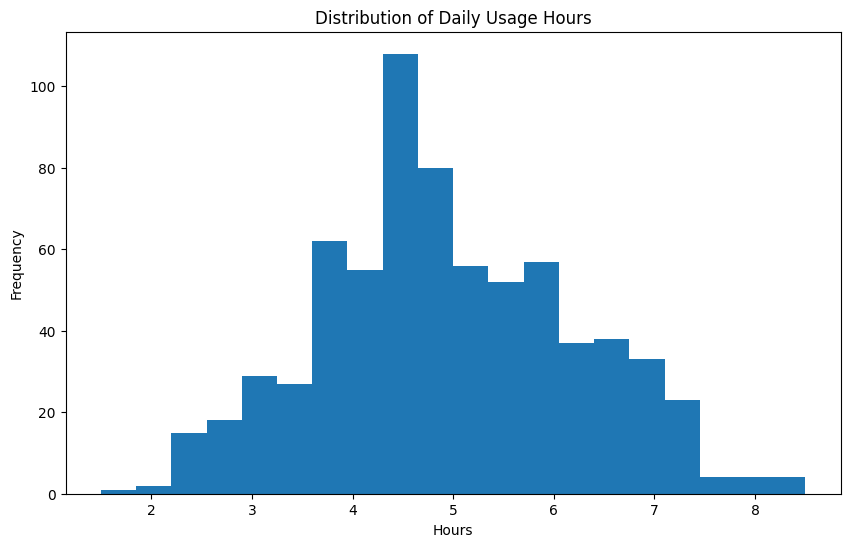

Daily Usage Hours Distribution Chart Displayed.


In [15]:
#Average Daily Usage Hours (If Exists)


if 'Avg_Daily_Usage_Hours' in df.columns:
    print("\nDaily Usage Hours Summary:")
    print(df['Avg_Daily_Usage_Hours'].describe())

    df['Avg_Daily_Usage_Hours'].plot(kind='hist', bins=20)
    plt.title("Distribution of Daily Usage Hours")
    plt.xlabel("Hours")
    plt.ylabel("Frequency")
    plt.show()

    print("Daily Usage Hours Distribution Chart Displayed.")


Addiction Level Distribution:
Addicted_Score
7    209
8    144
5    136
4     83
6     61
9     55
3     16
2      1
Name: count, dtype: int64


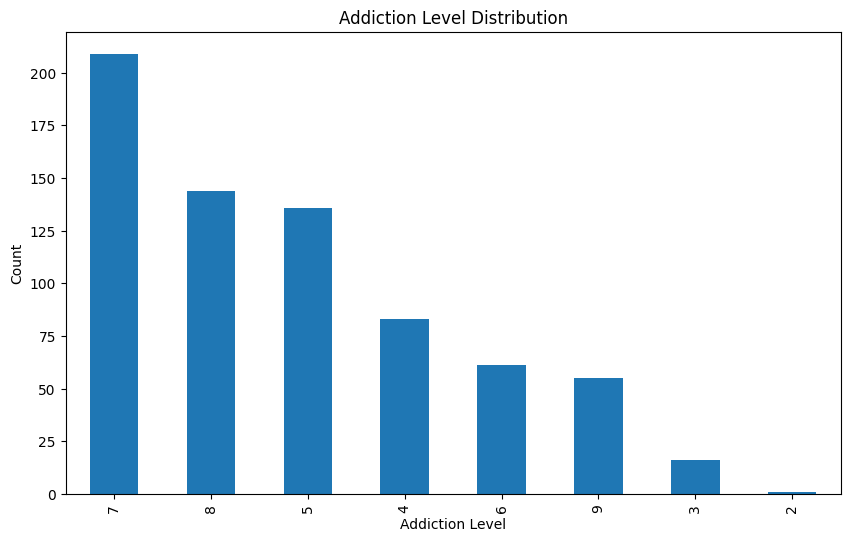

Addiction Level Chart Displayed.


In [17]:
#Addiction Level Analysis (If Exists)


if 'Addicted_Score' in df.columns:
    print("\nAddiction Level Distribution:")
    print(df['Addicted_Score'].value_counts())

    df['Addicted_Score'].value_counts().plot(kind='bar')
    plt.title("Addiction Level Distribution")
    plt.xlabel("Addiction Level")
    plt.ylabel("Count")
    plt.show()

    print("Addiction Level Chart Displayed.")


Most Used Platform Distribution:
Most_Used_Platform
Instagram    249
TikTok       154
Facebook     123
WhatsApp      54
Twitter       30
LinkedIn      21
WeChat        15
Snapchat      13
VKontakte     12
LINE          12
KakaoTalk     12
YouTube       10
Name: count, dtype: int64


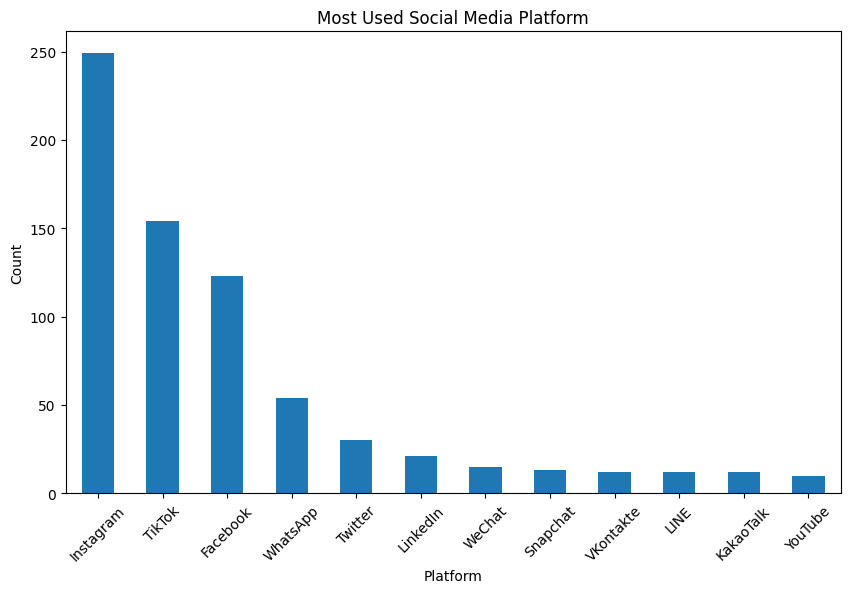

Platform Usage Chart Displayed.


In [18]:
#Platform Usage Analysis (If Exists)


if 'Most_Used_Platform' in df.columns:
    print("\nMost Used Platform Distribution:")
    print(df['Most_Used_Platform'].value_counts())

    df['Most_Used_Platform'].value_counts().plot(kind='bar')
    plt.title("Most Used Social Media Platform")
    plt.xlabel("Platform")
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.show()

    print("Platform Usage Chart Displayed.")


Average Daily Usage by Academic Performance:
Affects_Academic_Performance
No     3.804365
Yes    5.538631
Name: Avg_Daily_Usage_Hours, dtype: float64


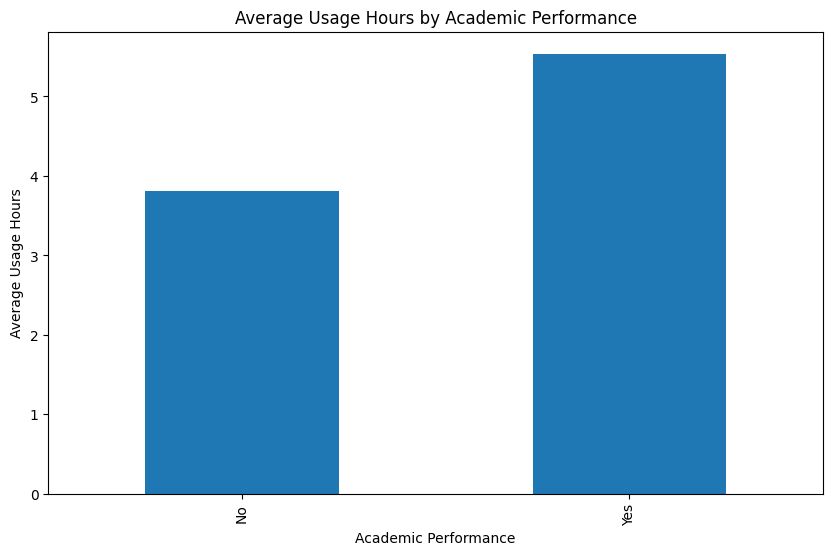

Academic Performance vs Usage Chart Displayed.


In [20]:
#Academic Performance vs Usage (If Columns Exist)


if 'Avg_Daily_Usage_Hours' in df.columns and 'Affects_Academic_Performance' in df.columns:
    print("\nAverage Daily Usage by Academic Performance:")
    avg_usage = df.groupby('Affects_Academic_Performance')['Avg_Daily_Usage_Hours'].mean()
    print(avg_usage)

    avg_usage.plot(kind='bar')
    plt.title("Average Usage Hours by Academic Performance")
    plt.xlabel("Academic Performance")
    plt.ylabel("Average Usage Hours")
    plt.show()

    print("Academic Performance vs Usage Chart Displayed.")


Generating Correlation Matrix...

Correlation Matrix:
                             Student_ID       Age  Avg_Daily_Usage_Hours  \
Student_ID                     1.000000  0.222306               0.267524   
Age                            0.222306  1.000000              -0.113682   
Avg_Daily_Usage_Hours          0.267524 -0.113682               1.000000   
Sleep_Hours_Per_Night          0.173793  0.125265              -0.790582   
Mental_Health_Score           -0.055037  0.160278              -0.801058   
Conflicts_Over_Social_Media    0.173258 -0.184482               0.804582   
Addicted_Score                 0.041637 -0.166396               0.832000   

                             Sleep_Hours_Per_Night  Mental_Health_Score  \
Student_ID                                0.173793            -0.055037   
Age                                       0.125265             0.160278   
Avg_Daily_Usage_Hours                    -0.790582            -0.801058   
Sleep_Hours_Per_Night               

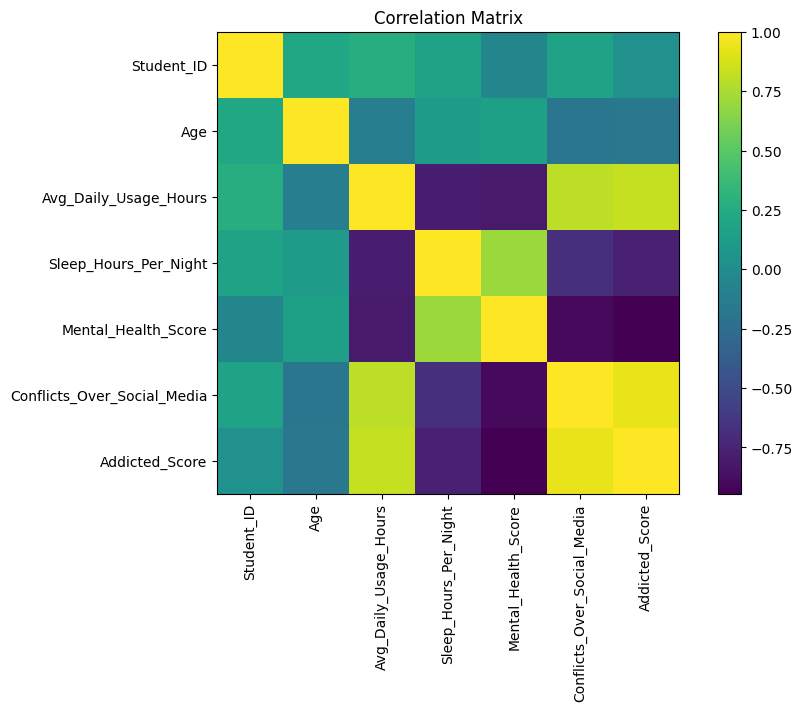

Correlation Matrix Chart Displayed.


In [21]:
#Correlation Matrix (Numerical Columns)


print("\nGenerating Correlation Matrix...")

numeric_df = df.select_dtypes(include=np.number)
correlation_matrix = numeric_df.corr()

print("\nCorrelation Matrix:")
print(correlation_matrix)

plt.imshow(correlation_matrix)
plt.colorbar()
plt.title("Correlation Matrix")
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=90)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.show()

print("Correlation Matrix Chart Displayed.")

In [22]:
#Save Cleaned Dataset


df.to_csv("Cleaned_Students_Social_Media_Addiction.csv", index=False)

print("\nCleaned Dataset Saved Successfully!")


Cleaned Dataset Saved Successfully!
